In [1]:
import geoplot
import geopandas
import numpy as np
from pykrige.rk import Krige
from sklearn.model_selection import GridSearchCV
import pandas as pd
import geopandas
import matplotlib.pyplot as plt



Bad key "text.kerning_factor" on line 4 in
/Users/trent/opt/anaconda3/envs/DataAnalysis/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
import os
os.getcwd()


'/Users/trent/Documents/Study/Courses/2022.1/STAT 545 Spatial Statistics/Final Project/Code'

In [3]:
# ['covid_hospital_admissions_per_100k','covid_cases_per_100k','lon','lat']
dt = pd.read_csv('Data/cleaned_data.csv')
dt = dt[~dt['lon'].isna()]
dt = dt[dt['Unnamed: 0'] != 35199]
dt


,Unnamed: 0,county,state,county_population,covid_hospital_admissions_per_100k,covid_cases_per_100k,lon,lat
0,32240,Hardy County,West Virginia,13776.0,1.3,50.81,-78.844128,39.004001
1,32241,Allegany County,Maryland,70416.0,1.3,51.12,-78.655063,39.657245
2,32242,Garrett County,Maryland,29014.0,1.3,17.23,-79.249698,39.544087
3,32243,Grant County,West Virginia,11568.0,1.3,25.93,-79.206674,39.067443
4,32244,Mineral County,West Virginia,26868.0,1.3,26.05,-78.941692,39.383991
...,...,...,...,...,...,...,...,...
3217,35457,Petersburg CA,Alaska,3266.0,0.0,398.04,-132.955470,56.812796
3218,35458,Prince of Wales-Hyder CA,Alaska,6203.0,0.0,257.94,-132.948303,55.404070
3220,35460,Commonwealth of the Northern Mariana Islands,Commonwealth of the Northern Mariana Islands,51851.0,0.0,34.71,145.838611,17.598611
3221,35461,United States Virgin Islands,United States Virgin Islands,106290.0,2.8,619.06,-64.759016,17.728956


In [4]:
gdf = geopandas.GeoDataFrame(
    dt, geometry=geopandas.points_from_xy(dt.lon, dt.lat), crs='EPSG:4326')
# gdf.explore("covid_hospital_admissions_per_100k", legend=True,cmap='Reds')
gdf.explore("covid_cases_per_100k", legend=True, cmap='Reds')
# gdf.explore("county_population", legend=True,cmap='Reds')


In [5]:
gdf


,Unnamed: 0,county,state,county_population,covid_hospital_admissions_per_100k,covid_cases_per_100k,lon,lat,geometry
0,32240,Hardy County,West Virginia,13776.0,1.3,50.81,-78.844128,39.004001,POINT (-78.84413 39.00400)
1,32241,Allegany County,Maryland,70416.0,1.3,51.12,-78.655063,39.657245,POINT (-78.65506 39.65725)
2,32242,Garrett County,Maryland,29014.0,1.3,17.23,-79.249698,39.544087,POINT (-79.24970 39.54409)
3,32243,Grant County,West Virginia,11568.0,1.3,25.93,-79.206674,39.067443,POINT (-79.20667 39.06744)
4,32244,Mineral County,West Virginia,26868.0,1.3,26.05,-78.941692,39.383991,POINT (-78.94169 39.38399)
...,...,...,...,...,...,...,...,...,...
3217,35457,Petersburg CA,Alaska,3266.0,0.0,398.04,-132.955470,56.812796,POINT (-132.95547 56.81280)
3218,35458,Prince of Wales-Hyder CA,Alaska,6203.0,0.0,257.94,-132.948303,55.404070,POINT (-132.94830 55.40407)
3220,35460,Commonwealth of the Northern Mariana Islands,Commonwealth of the Northern Mariana Islands,51851.0,0.0,34.71,145.838611,17.598611,POINT (145.83861 17.59861)
3221,35461,United States Virgin Islands,United States Virgin Islands,106290.0,2.8,619.06,-64.759016,17.728956,POINT (-64.75902 17.72896)


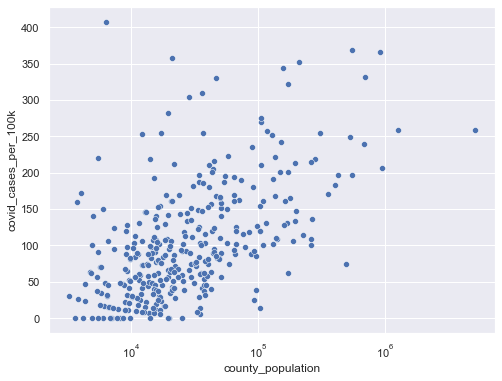

In [29]:
fig.get_figure()


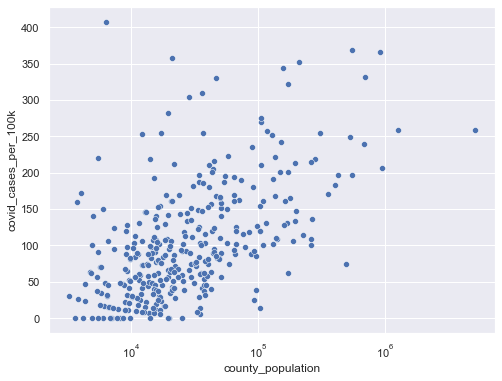

In [38]:
import seaborn as sns
sns.set(rc={'figure.figsize':(8,6)})

gdf = gdf[gdf['state'].isin(['Illinois', 'Iowa', 'Wisconsin', 'Minnesota'])]
gdf = gdf[gdf.covid_cases_per_100k < 800]

fig = sns.scatterplot(data=gdf, x="county_population",
                      y="covid_cases_per_100k")
# sns.scatterplot(data=gdf, x="county_population", y="covid_cases_per_100k")
fig.set(xscale="log")
fig.get_figure().savefig('../Report/fig/Relationship Between Population and Cases (Log).pdf')


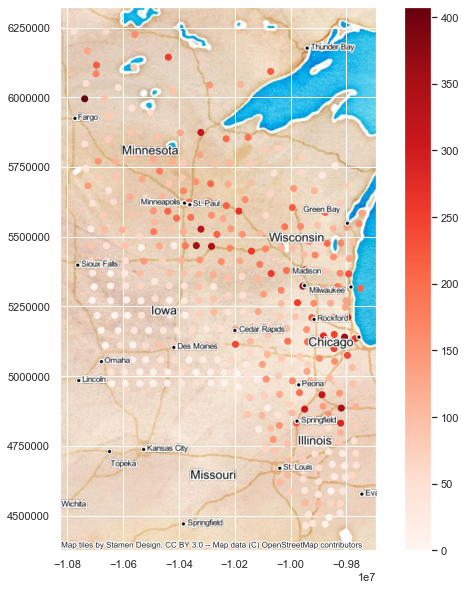

In [32]:
import contextily as cx
gdf = gdf.to_crs(epsg=3857)
ax = gdf.plot(figsize=(10, 10), column="covid_cases_per_100k",
              legend=True, cmap='Reds')
cx.add_basemap(ax, source=cx.providers.Stamen.Watercolor, zoom=6)
cx.add_basemap(ax, source=cx.providers.Stamen.TonerLabels, zoom=6)
ax.get_figure().savefig('../Report/fig/Data Points.pdf')


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from pykrige.rk import RegressionKriging
from pykrige.rk import Krige
from sklearn.model_selection import GridSearchCV


In [82]:
from sklearn.model_selection import KFold
lr_model = LinearRegression(normalize=True, copy_X=True, fit_intercept=False)

p = np.log(gdf['county_population']).to_numpy().reshape(-1, 1)
# p = np.log(gdf['county_population']).to_numpy().reshape(-1, 1)
X = gdf[['lon', 'lat']].to_numpy()
y = gdf['covid_cases_per_100k'].to_numpy()

kf = KFold(n_splits=10)
score=[]
for cv_ind, (train, test) in enumerate(kf.split(X)):
    p_train, p_test, x_train, x_test, y_train, y_test = p[
        train], p[test], X[train], X[test], y[train], y[test]
    for method in ["ordinary", "universal"]:
        for variogram_model in ["linear", "power", "gaussian", "spherical"]:
            m_rk = RegressionKriging(regression_model=lr_model,     
                                        method=method,
                                        variogram_model=variogram_model, n_closest_points=10)
            m_rk.fit(p_train, x_train, y_train)
            # cv_ind, method, variogram_model
            tmp=[cv_ind, method,variogram_model]
            # score, score_type,cv_ind, method, variogram_model
            score.append([m_rk.regression_model.score(
                p_test, y_test), 'Regression']+tmp)
            score.append([m_rk.score(
                p_test,x_test, y_test), 'Regression Kriging']+tmp)


Finished learning regression model
Finished kriging residuals
Finished learning regression model
Finished kriging residuals
Finished learning regression model
Finished kriging residuals
Finished learning regression model
Finished kriging residuals
Finished learning regression model
Finished kriging residuals
n_closest_points will be ignored for UniversalKriging
Finished learning regression model
Finished kriging residuals
n_closest_points will be ignored for UniversalKriging
Finished learning regression model
Finished kriging residuals
n_closest_points will be ignored for UniversalKriging
Finished learning regression model
Finished kriging residuals
n_closest_points will be ignored for UniversalKriging
Finished learning regression model
Finished kriging residuals
Finished learning regression model
Finished kriging residuals
Finished learning regression model
Finished kriging residuals
Finished learning regression model
Finished kriging residuals
Finished learning regression model
Finis

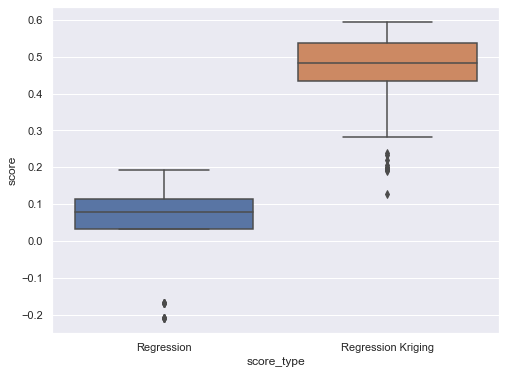

In [35]:
score=pd.DataFrame(score, columns=["score", "score_type", "cv_ind",
             "method", "variogram_model"])
score=score[score.score >-0.6]
ax = sns.boxplot(x="score_type", y="score", data=score)
ax.get_figure().savefig('../Report/fig/Regression vs Regression Kriging.pdf')


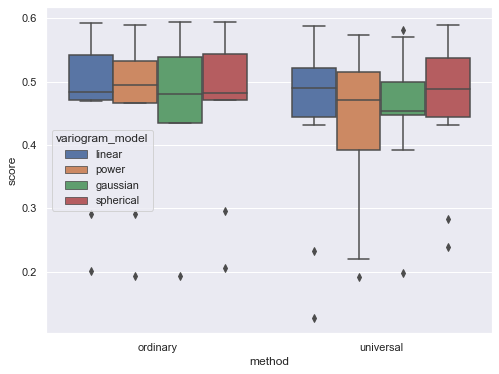

In [34]:

ax = sns.boxplot(x="method", y="score", hue="variogram_model",
                 data=score[score.score_type == 'Regression Kriging'])
ax.get_figure().savefig('../Report/fig/Regression Kriging.pdf')


In [13]:
# fit on all data of method='ordinary',variogram_model='spherical'

p = np.log(gdf['county_population']).to_numpy().reshape(-1, 1)
# p = np.log(gdf['county_population']).to_numpy().reshape(-1, 1)
X = gdf[['lon', 'lat']].to_numpy()
y = gdf['covid_cases_per_100k'].to_numpy()


print("=" * 40)
print("regression model:", lr_model.__class__.__name__)
lr_model = LinearRegression(normalize=True, copy_X=True, fit_intercept=False)
model = RegressionKriging(regression_model=lr_model, method='ordinary',
                         variogram_model='spherical', n_closest_points=10)

model.fit(p, X, y)

regression model: LinearRegression
Finished learning regression model
Finished kriging residuals


In [73]:
from scipy import spatial

lap=0.05
min_lon, max_lon=min(gdf['lon']),max(gdf['lon'])
min_lat, max_lat=min(gdf['lat']),max(gdf['lat'])

num=100
X_new = np.array([[lon, lat] for lon in np.linspace(
    min_lon, max_lon, num) for lat in np.linspace(min_lat, max_lat, num)])


distance, index = spatial.KDTree(X).query(X_new)
population=gdf['county_population'].to_numpy()
p_new = np.log(population[index].reshape(-1, 1))

# model.predict(p=p_new, x=X_new)
y_pred=model.predict(p=p_new, x=X_new)


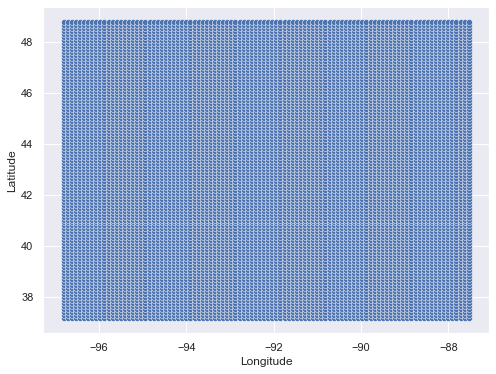

In [80]:
grid_gdf=pd.DataFrame(
    X_new, columns=['Longitude', 'Latitude'])
grid_gdf= geopandas.GeoDataFrame(
    grid_gdf, geometry=geopandas.points_from_xy(grid_gdf.Longitude, grid_gdf.Latitude), crs='EPSG:4326')
grid_gdf = grid_gdf.to_crs(epsg=3857)

# grid_gdf.plot(figsize=(10, 10))
# cx.add_basemap(ax, source=cx.providers.Stamen.Watercolor, zoom=6)
# cx.add_basemap(ax, source=cx.providers.Stamen.TonerLabels, zoom=6)

ax = sns.scatterplot(data=grid_gdf, x='Longitude', y='Latitude')
ax.get_figure().savefig('../Report/fig/Grid.pdf')


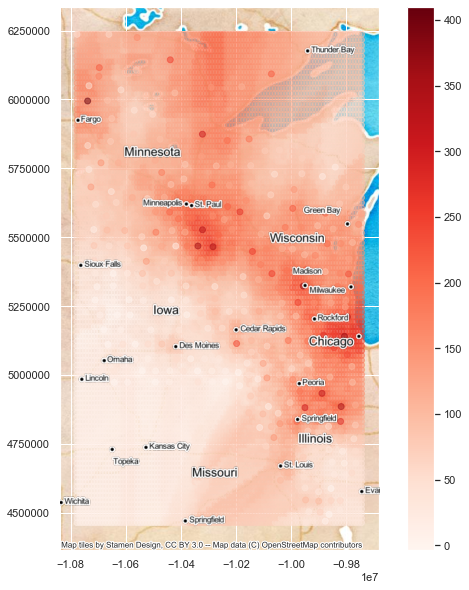

In [67]:
pred = pd.DataFrame([y_pred, p_new.reshape(-1), X_new[:, 0], X_new[:, 1]]).T
pred.columns=['pred','population','lon','lat']
pred = geopandas.GeoDataFrame(
    pred, geometry=geopandas.points_from_xy(pred.lon, pred.lat), crs='EPSG:4326')
pred = pred.to_crs(epsg=3857)
ax = pred.plot(figsize=(10, 10), column="pred",
               legend=True, cmap='Reds', alpha=0.5,vmax=410)
gdf.plot(ax=ax, figsize=(10, 10), column="covid_cases_per_100k",
         legend=False, cmap='Reds', alpha=0.5, vmax=410)
cx.add_basemap(ax, source=cx.providers.Stamen.Watercolor, zoom=6)
cx.add_basemap(ax, source=cx.providers.Stamen.TonerLabels, zoom=6)
ax.get_figure().savefig('../Report/fig/Prediction.pdf')


In [59]:
pred=model.predict(p=p, x=X)
gdf['pred']=pred


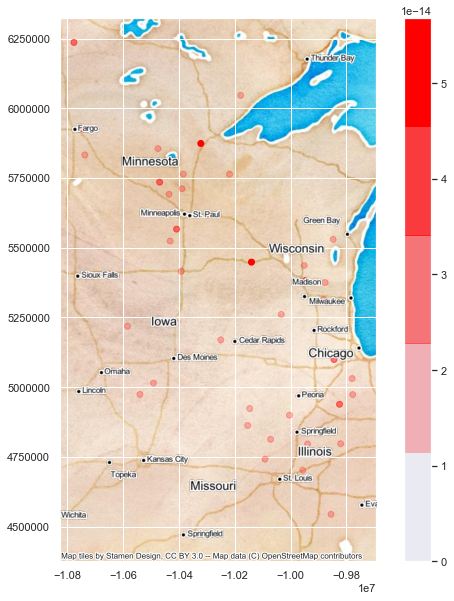

In [66]:
# create transparent color map
import matplotlib.colors as mcolors
colors = [(1,0,0,c) for c in np.linspace(0,1,100)]
cmapred = mcolors.LinearSegmentedColormap.from_list('mycmap', colors, N=5)

gdf['pred_error'] = np.sqrt((pred-y)**2)
ax = gdf.plot(figsize=(10, 10), column="pred_error",
              legend=True, cmap=cmapred)
cx.add_basemap(ax, source=cx.providers.Stamen.Watercolor, zoom=6)
cx.add_basemap(ax, source=cx.providers.Stamen.TonerLabels, zoom=6)
# ax.get_figure().savefig('../Report/fig/Prediction Error on Data.pdf')
